In [18]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [19]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df.info()


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

In [21]:
df.columns

Index([&#39;Id&#39;, &#39;MSSubClass&#39;, &#39;MSZoning&#39;, &#39;LotFrontage&#39;, &#39;LotArea&#39;, &#39;Street&#39;,
       &#39;Alley&#39;, &#39;LotShape&#39;, &#39;LandContour&#39;, &#39;Utilities&#39;, &#39;LotConfig&#39;,
       &#39;LandSlope&#39;, &#39;Neighborhood&#39;, &#39;Condition1&#39;, &#39;Condition2&#39;, &#39;BldgType&#39;,
       &#39;HouseStyle&#39;, &#39;OverallQual&#39;, &#39;OverallCond&#39;, &#39;YearBuilt&#39;, &#39;YearRemodAdd&#39;,
       &#39;RoofStyle&#39;, &#39;RoofMatl&#39;, &#39;Exterior1st&#39;, &#39;Exterior2nd&#39;, &#39;MasVnrType&#39;,
       &#39;MasVnrArea&#39;, &#39;ExterQual&#39;, &#39;ExterCond&#39;, &#39;Foundation&#39;, &#39;BsmtQual&#39;,
       &#39;BsmtCond&#39;, &#39;BsmtExposure&#39;, &#39;BsmtFinType1&#39;, &#39;BsmtFinSF1&#39;,
       &#39;BsmtFinType2&#39;, &#39;BsmtFinSF2&#39;, &#39;BsmtUnfSF&#39;, &#39;TotalBsmtSF&#39;, &#39;Heating&#39;,
       &#39;HeatingQC&#39;, &#39;CentralAir&#39;, &#39;Electrical&#39;, &#39;1stFlrSF&#39;

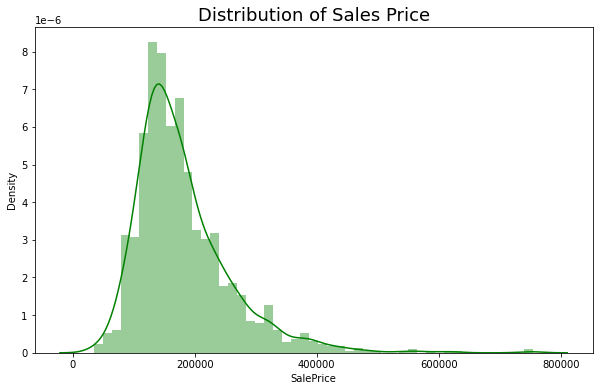

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'], color='g')
plt.title('Distribution of Sales Price', fontsize=18)
plt.show() 

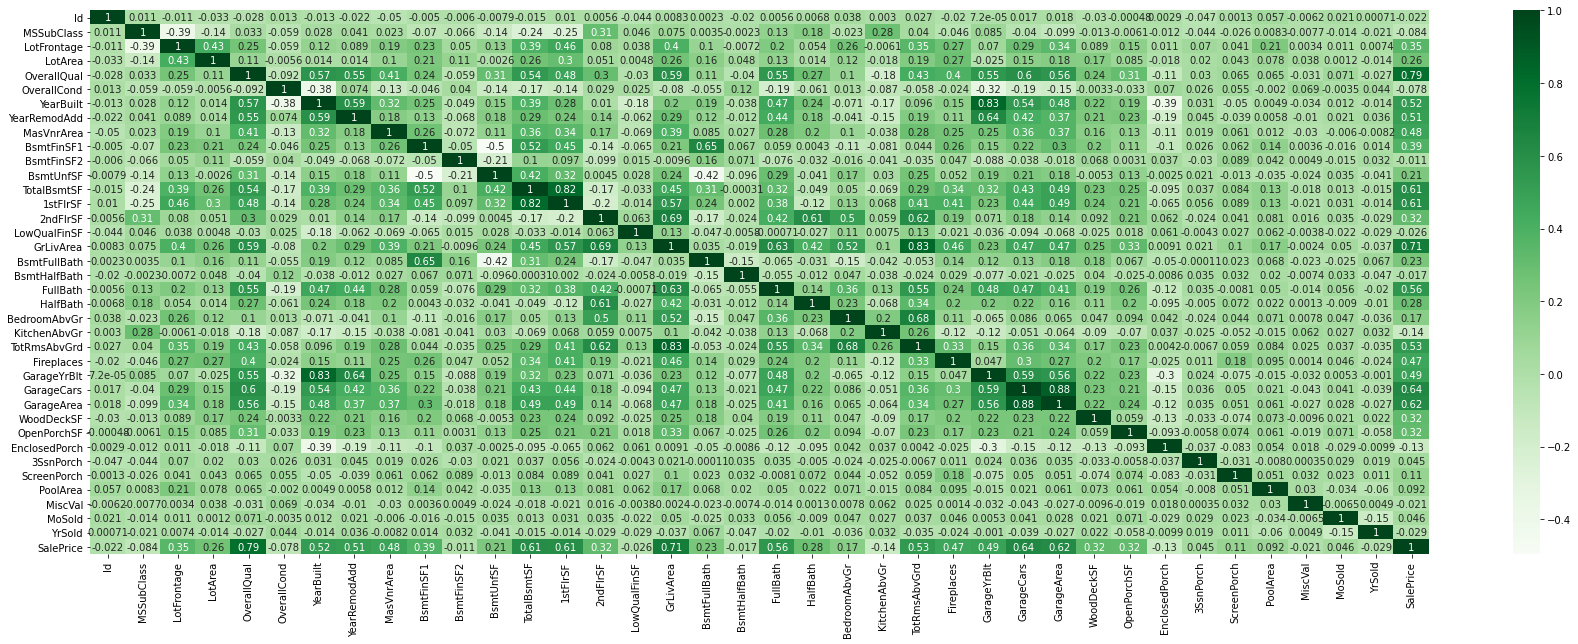

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

In [24]:
corr = df.corr()
top_corr_features = corr.index[corr['SalePrice']>0.5]
top_corr_features

Index([&#39;OverallQual&#39;, &#39;YearBuilt&#39;, &#39;YearRemodAdd&#39;, &#39;TotalBsmtSF&#39;, &#39;1stFlrSF&#39;,
       &#39;GrLivArea&#39;, &#39;FullBath&#39;, &#39;TotRmsAbvGrd&#39;, &#39;GarageCars&#39;, &#39;GarageArea&#39;,
       &#39;SalePrice&#39;],
      dtype=&#39;object&#39;)

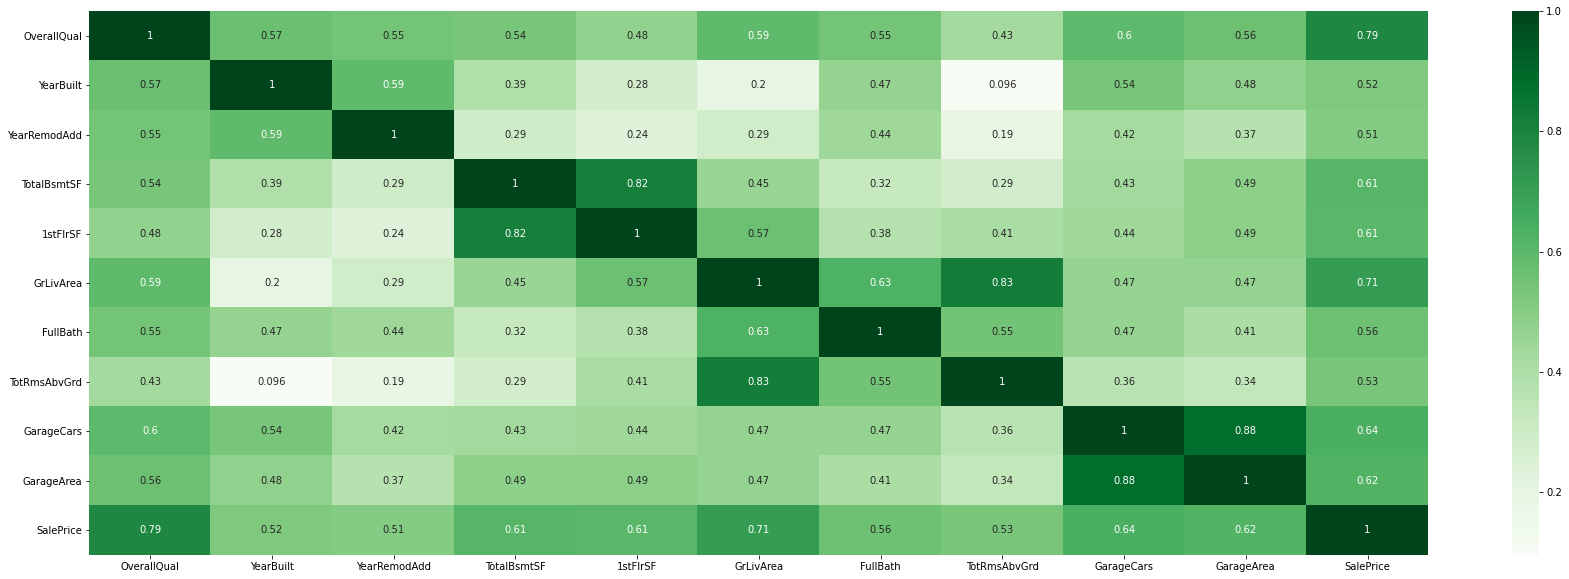

In [25]:
plt.figure(figsize=(30,10))
sns.heatmap(df[top_corr_features].corr(),cmap='Greens',annot=True)
plt.show()

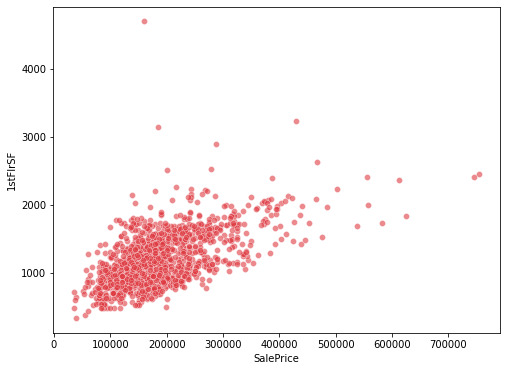

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SalePrice',y='1stFlrSF',data=df , color="#DF3A41", alpha=0.6)
plt.show()

&lt;Figure size 576x432 with 0 Axes&gt;

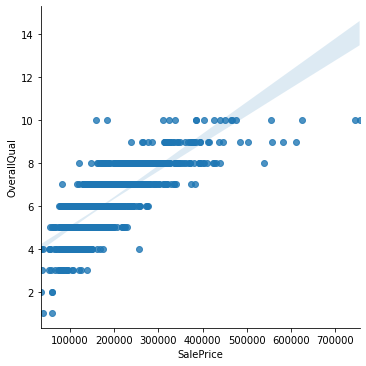

In [27]:
plt.figure(figsize=(8,6))
sns.lmplot(x='SalePrice',y='OverallQual', data=df)
plt.show()

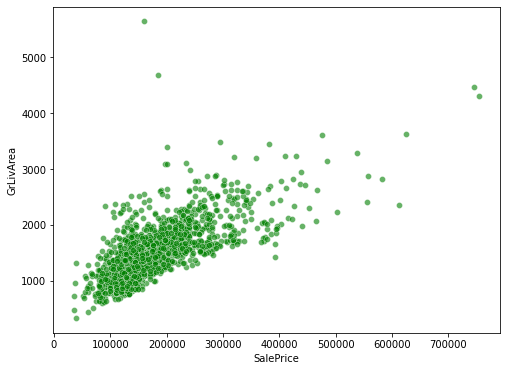

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'SalePrice', y='GrLivArea',color='g', data=df, alpha=0.6)
plt.show()

In [29]:
X = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y = df['SalePrice']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_std


array([[-0.0959902 ,  0.78183168,  0.4614143 , ..., -0.32877955,
         0.31820155,  0.22846291],
       [-0.84105699, -0.04472536, -0.75479738, ..., -0.94124888,
         0.31820155,  0.72242059],
       [ 0.64907659,  0.15364833, -0.46290658, ...,  0.89615912,
         0.31820155,  0.26203284],
       ...,
       [-0.0959902 , -1.89621313,  0.99654743, ...,  0.28368978,
        -2.4480306 , -2.27009973],
       [-0.0959902 , -0.01166307, -0.70614891, ..., -0.94124888,
        -1.06491453, -1.00403344],
       [-2.33119058, -1.20190521, -1.72776672, ..., -0.32877955,
         1.70131763,  3.7149409 ]])

In [31]:
lr = LinearRegression(normalize=False)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print('Predict price:', lr.predict(X_test_std)[:10] )
MAE = mean_absolute_error(y_test, lr.predict(X_test_std), multioutput='uniform_average') 
print('MAE:',MAE)

Training accuracy: 0.7417080090798283
Test accuracy: 0.8159125484408637
Predict price: [218668.74582095 161866.49602298 107394.66954252  49102.20888632
 141998.83826899 295606.56269643 291792.52507421 178443.37169447
 224179.32199665 221696.65310966]
MAE: 24645.13179616481


In [1]:
tree = DecisionTreeRegressor(random_state=101)
tree.fit(X_train_std, y_train)

tree.score(X_test_std, y_test)

NameError: name &#39;DecisionTreeRegressor&#39; is not defined